In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

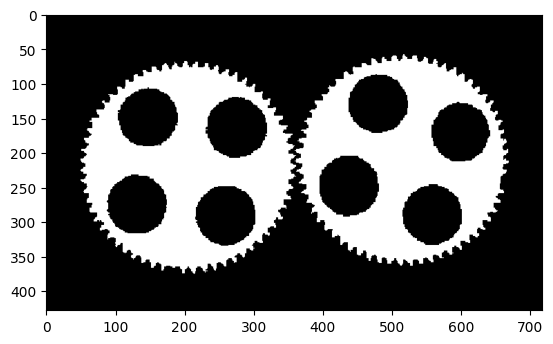

In [46]:
image = cv2.imread('/content/sample_data/Шестеренки.png', cv2.IMREAD_GRAYSCALE)
_, B = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
plt.imshow(B, 'gray')

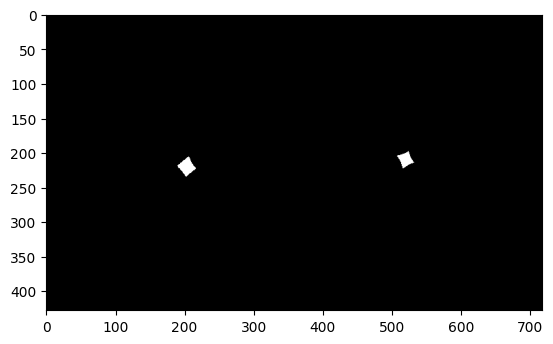

In [134]:
####################################### B1 = B - hole_ring
def hole_ring(width, size):
  _k = np.zeros((size,size), dtype = np.uint8)
  r1 = size/2
  r2 = size/2 - width

  for i in range(size):
    for j in range(size):
      if ((((i - r1)**2 + (j - r1)**2) <= r1**2) and  (((i - r1)**2 + (j - r1)**2) >= r2**2)):
        _k[i,j] = 1
  return _k[1:, 1:]

# Erode
kernel = hole_ring(1, 75) # кольцо пикселов, диаметр которого немного превышает диаметр четырех внутренних отверстий шестеренок.
B1 = cv2.erode(B, kernel)

plt.figure()
plt.imshow(B1, 'gray')
plt.show()

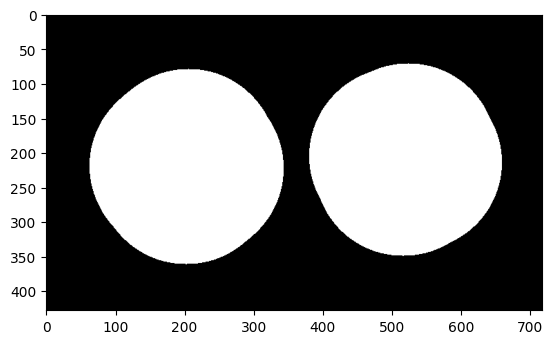

In [136]:
####################################### B2 = B1 + hole_mask

# Dilation
B2 = cv2.dilate(B1, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (255, 255)))
plt.figure()
plt.imshow(B2, 'gray')

plt.show()

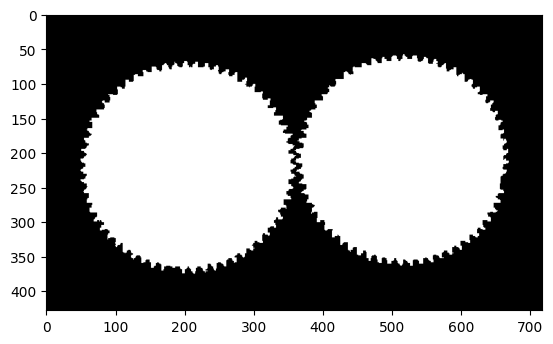

In [137]:
####################################### B3 = B2 OR B1
B3 = cv2.bitwise_or(B2, B)

plt.figure()
plt.imshow(B3, 'gray')

plt.show()

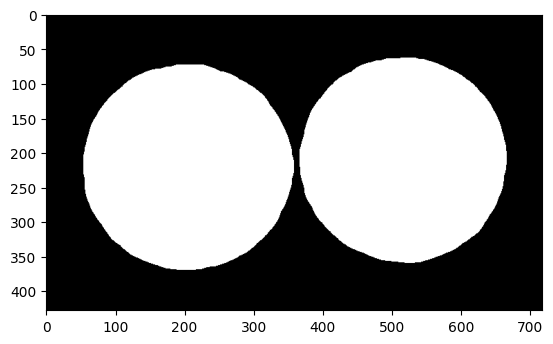

In [138]:
####################################### B4 = B3 opening gear_body

# Opening
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (80, 80)) # дисковый структурирующий элемент с радиусом, равным внешнему радиусу шестеренки, уменьшенному на высоту зубца
B4 = cv2.morphologyEx(B3, cv2.MORPH_OPEN, kernel)
B4 = cv2.dilate(B4, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9)))
plt.imshow(B4, 'gray')


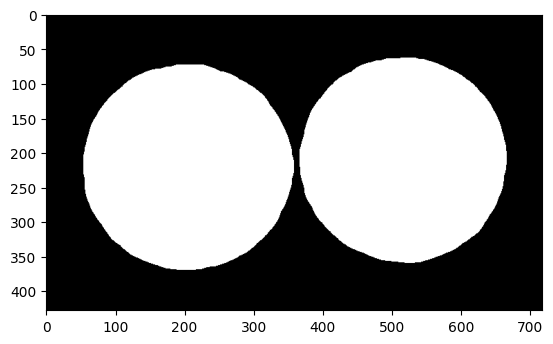

In [139]:
####################################### B5 = B4 + sampling_ring_spacer

# Dilation
B5 = cv2.dilate(B4, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11)))
plt.imshow(B4, 'gray')

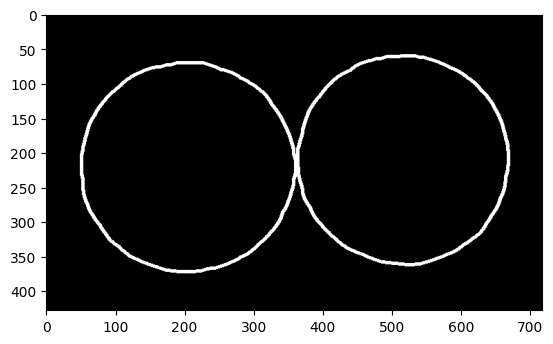

In [106]:
####################################### B6 = B5 + sampling_ring_width

# Dilation
B6 = cv2.absdiff(B5,B4)
plt.imshow(B6, 'gray')

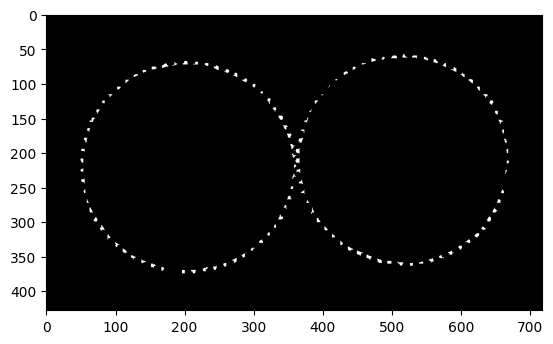

In [108]:
####################################### B8 = B AND B7

# Logical multiplication
B8 = cv2.bitwise_and(B, B6)

plt.imshow(B8, 'gray')

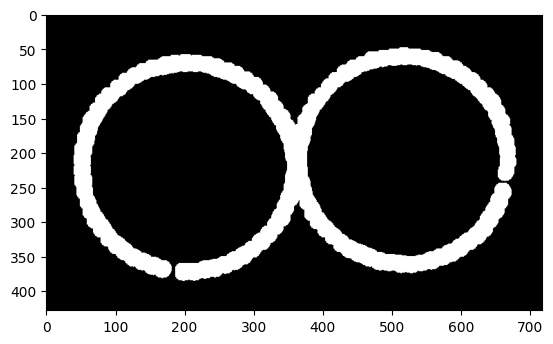

In [127]:
####################################### B9 = B8 + tip_spacing

# Dilation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (22, 22)) # tip_spacing: дисковый структурирующий элемент, диаметр которого соответствует промежутку между зубцами шестеренки.
B9 = cv2.dilate(B8, kernel, iterations=1)

plt.imshow(B9, 'gray')

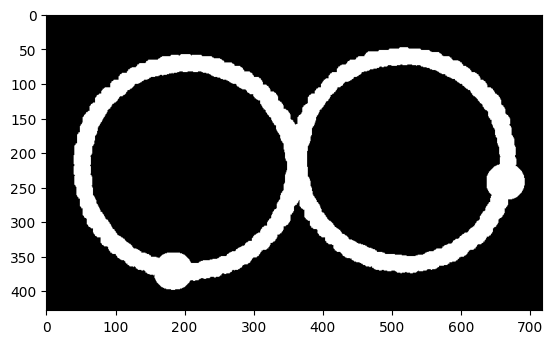

In [130]:
####################################### B10 = ((B7 - B9) + defect_cue) OR B9
B10 = cv2.subtract(B6, B9)
B10 = cv2.dilate(B10, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50)), iterations=1)
B10 = cv2.bitwise_or(B10, B9)
plt.imshow(B10, 'gray')